In [1]:
import pandas as pd
import numpy as np
import os
from env import host, user, password
import acquire

In [2]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import explore

plt.rcParams['figure.figsize'] = (4, 2)

In [3]:
df = acquire.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [4]:
df.isna().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
# found 11 customers who have blank total charges, are under contract, but have not churned. However their tenure is 0 so we know they are new customers. Therefore, I will replace the blanks with 0's. 
df.total_charges.replace(to_replace = {" ":"0"}, inplace = True)
df.total_charges = df.total_charges.astype("float")
df.total_charges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: total_charges, dtype: float64

In [7]:
df.head(2)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)


In [8]:
pd.set_option("display.max_columns", None)

In [9]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic)


In [10]:
df["auto_pay"] = df.payment_type.str.contains("auto")
df["auto_pay"] = df.auto_pay.replace(to_replace = [True,False],value = [1,0])
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,auto_pay
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check,0
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic),1
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic),1
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic),1
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic),1


In [11]:
dummy_df = pd.get_dummies(df[['gender',"internet_service_type","contract_type"]])
dummy_df.drop(columns=['gender_Female'], inplace=True)


In [12]:
dummy_df.head(1)

,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,0,1,0,0,0,0,1


In [13]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,auto_pay,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check,0,0,1,0,0,0,0,1
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic),1,1,1,0,0,0,0,1
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic),1,0,1,0,0,0,0,1
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic),1,1,1,0,0,0,0,1
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic),1,1,1,0,0,0,0,1


In [14]:
df["partner"] = df.partner.replace(to_replace = ["Yes","No"],value = [1,0])
df["dependents"] = df.dependents.replace(to_replace = ["Yes","No"],value = [1,0])
df["phone_service"] = df.phone_service.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["multiple_lines"] = df.multiple_lines.replace(to_replace = ["Yes","No","No phone service"],value = [1,0,0])
df["online_security"] = df.online_security.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["online_backup"] = df.online_backup.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["device_protection"] = df.device_protection.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["tech_support"] = df.tech_support.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["streaming_tv"] = df.streaming_tv.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["streaming_movies"] = df.streaming_movies.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["paperless_billing"] = df.paperless_billing.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["churn"] = df.churn.replace(to_replace = ["Yes","No"],value = [1,0])

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,auto_pay,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,2,1,3,0016-QLJIS,Female,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.90,0,Two year,DSL,Mailed check,0,0,1,0,0,0,0,1
1,4,1,3,0017-DINOC,Male,0,0,0,54,0,0,1,0,0,1,1,0,0,45.20,2460.55,0,Two year,DSL,Credit card (automatic),1,1,1,0,0,0,0,1
2,3,1,3,0019-GFNTW,Female,0,0,0,56,0,0,1,1,1,1,0,0,0,45.05,2560.10,0,Two year,DSL,Bank transfer (automatic),1,0,1,0,0,0,0,1
3,4,1,3,0056-EPFBG,Male,0,1,1,20,0,0,1,0,1,1,0,0,1,39.40,825.40,0,Two year,DSL,Credit card (automatic),1,1,1,0,0,0,0,1
4,3,1,3,0078-XZMHT,Male,0,1,0,72,1,1,0,1,1,1,1,1,1,85.15,6316.20,0,Two year,DSL,Bank transfer (automatic),1,1,1,0,0,0,0,1


In [15]:
df["add_ons"] =  ((df.online_security + df.online_backup + df.device_protection + df.tech_support + df.streaming_tv + df.streaming_movies) > 0)
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,auto_pay,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,add_ons
0,2,1,3,0016-QLJIS,Female,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.90,0,Two year,DSL,Mailed check,0,0,1,0,0,0,0,1,True
1,4,1,3,0017-DINOC,Male,0,0,0,54,0,0,1,0,0,1,1,0,0,45.20,2460.55,0,Two year,DSL,Credit card (automatic),1,1,1,0,0,0,0,1,True
2,3,1,3,0019-GFNTW,Female,0,0,0,56,0,0,1,1,1,1,0,0,0,45.05,2560.10,0,Two year,DSL,Bank transfer (automatic),1,0,1,0,0,0,0,1,True
3,4,1,3,0056-EPFBG,Male,0,1,1,20,0,0,1,0,1,1,0,0,1,39.40,825.40,0,Two year,DSL,Credit card (automatic),1,1,1,0,0,0,0,1,True
4,3,1,3,0078-XZMHT,Male,0,1,0,72,1,1,0,1,1,1,1,1,1,85.15,6316.20,0,Two year,DSL,Bank transfer (automatic),1,1,1,0,0,0,0,1,True


In [16]:
df["add_ons"] = df.add_ons.replace(to_replace = [True, False],value = [1,0])
df.add_ons

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: add_ons, Length: 7043, dtype: int64

In [17]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,auto_pay,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,add_ons
0,2,1,3,0016-QLJIS,Female,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.90,0,Two year,DSL,Mailed check,0,0,1,0,0,0,0,1,1
1,4,1,3,0017-DINOC,Male,0,0,0,54,0,0,1,0,0,1,1,0,0,45.20,2460.55,0,Two year,DSL,Credit card (automatic),1,1,1,0,0,0,0,1,1
2,3,1,3,0019-GFNTW,Female,0,0,0,56,0,0,1,1,1,1,0,0,0,45.05,2560.10,0,Two year,DSL,Bank transfer (automatic),1,0,1,0,0,0,0,1,1
3,4,1,3,0056-EPFBG,Male,0,1,1,20,0,0,1,0,1,1,0,0,1,39.40,825.40,0,Two year,DSL,Credit card (automatic),1,1,1,0,0,0,0,1,1
4,3,1,3,0078-XZMHT,Male,0,1,0,72,1,1,0,1,1,1,1,1,1,85.15,6316.20,0,Two year,DSL,Bank transfer (automatic),1,1,1,0,0,0,0,1,1


In [18]:
df = df.drop(columns= ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id', 'gender', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'internet_service_type', 'payment_type'])
df.head()                        

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,auto_pay,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,add_ons
0,0,1,1,65,1,1,1,90.45,5957.90,0,0,0,1,0,0,0,0,1,1
1,0,0,0,54,0,0,0,45.20,2460.55,0,1,1,1,0,0,0,0,1,1
2,0,0,0,56,0,0,0,45.05,2560.10,0,1,0,1,0,0,0,0,1,1
3,0,1,1,20,0,0,1,39.40,825.40,0,1,1,1,0,0,0,0,1,1
4,0,1,0,72,1,1,1,85.15,6316.20,0,1,1,1,0,0,0,0,1,1


In [19]:
churned_customers = df[df.churn == 1]
churned_customers.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,auto_pay,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,add_ons
44,0,1,0,64,0,0,0,47.85,3147.50,1,0,0,1,0,0,0,0,1,1
194,0,1,1,55,1,0,0,57.55,3046.40,1,1,1,1,0,0,0,0,1,1
203,0,1,0,70,1,1,0,65.30,4759.75,1,1,0,1,0,0,0,0,1,1
253,0,1,1,67,1,1,1,79.70,5293.40,1,0,1,1,0,0,0,0,1,1
326,0,1,1,65,1,0,1,74.80,4820.15,1,1,1,1,0,0,0,0,1,1


In [20]:
loyal_customers = df[df.churn == 0]
loyal_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5174 entries, 0 to 7041
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   senior_citizen                     5174 non-null   int64  
 1   partner                            5174 non-null   int64  
 2   dependents                         5174 non-null   int64  
 3   tenure                             5174 non-null   int64  
 4   phone_service                      5174 non-null   int64  
 5   multiple_lines                     5174 non-null   int64  
 6   paperless_billing                  5174 non-null   int64  
 7   monthly_charges                    5174 non-null   float64
 8   total_charges                      5174 non-null   float64
 9   churn                              5174 non-null   int64  
 10  auto_pay                           5174 non-null   int64  
 11  gender_Male                        5174 non-null   uint8

In [21]:
churned_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 44 to 7042
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   senior_citizen                     1869 non-null   int64  
 1   partner                            1869 non-null   int64  
 2   dependents                         1869 non-null   int64  
 3   tenure                             1869 non-null   int64  
 4   phone_service                      1869 non-null   int64  
 5   multiple_lines                     1869 non-null   int64  
 6   paperless_billing                  1869 non-null   int64  
 7   monthly_charges                    1869 non-null   float64
 8   total_charges                      1869 non-null   float64
 9   churn                              1869 non-null   int64  
 10  auto_pay                           1869 non-null   int64  
 11  gender_Male                        1869 non-null   uint

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   senior_citizen                     7043 non-null   int64  
 1   partner                            7043 non-null   int64  
 2   dependents                         7043 non-null   int64  
 3   tenure                             7043 non-null   int64  
 4   phone_service                      7043 non-null   int64  
 5   multiple_lines                     7043 non-null   int64  
 6   paperless_billing                  7043 non-null   int64  
 7   monthly_charges                    7043 non-null   float64
 8   total_charges                      7043 non-null   float64
 9   churn                              7043 non-null   int64  
 10  auto_pay                           7043 non-null   int64  
 11  gender_Male                        7043 non-null   uint8

In [23]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [24]:
train, validate, test = train_validate_test_split(df, 'churn', seed=123)

In [25]:
train.shape, validate.shape, test.shape

((3943, 19), (1691, 19), (1409, 19))

In [26]:
train.isna().sum()

senior_citizen                       0
partner                              0
dependents                           0
tenure                               0
phone_service                        0
multiple_lines                       0
paperless_billing                    0
monthly_charges                      0
total_charges                        0
churn                                0
auto_pay                             0
gender_Male                          0
internet_service_type_DSL            0
internet_service_type_Fiber optic    0
internet_service_type_None           0
contract_type_Month-to-month         0
contract_type_One year               0
contract_type_Two year               0
add_ons                              0
dtype: int64

<AxesSubplot:>

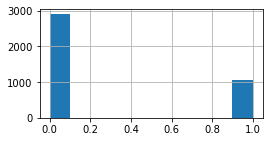

In [27]:
train.churn.hist()

<AxesSubplot:>

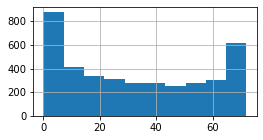

In [28]:
train.tenure.hist()

In [29]:
for column in df.columns:
    print(column)
    print("Population:")
    print(df[column].value_counts(normalize=True))
    print("Churned Customers:")
    print(churned_customers[column].value_counts(normalize=True))
    print("Loyal Customers:")
    print(loyal_customers[column].value_counts(normalize=True))
    print()
    print()

senior_citizen
Population:
0    0.837853
1    0.162147
Name: senior_citizen, dtype: float64
Churned Customers:
0    0.745318
1    0.254682
Name: senior_citizen, dtype: float64
Loyal Customers:
0    0.871279
1    0.128721
Name: senior_citizen, dtype: float64


partner
Population:
0    0.516967
1    0.483033
Name: partner, dtype: float64
Churned Customers:
0    0.642055
1    0.357945
Name: partner, dtype: float64
Loyal Customers:
1    0.528218
0    0.471782
Name: partner, dtype: float64


dependents
Population:
0    0.700412
1    0.299588
Name: dependents, dtype: float64
Churned Customers:
0    0.825575
1    0.174425
Name: dependents, dtype: float64
Loyal Customers:
0    0.655199
1    0.344801
Name: dependents, dtype: float64


tenure
Population:
1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
        ...   
28    0.008093
39    0.007951
44    0.007241
36    0.007099
0     0.001562
Name: tenure, Length: 73, dtype: float64
Churned Customers:
1     0.203317
2    

In [30]:
df.tenure.mean(), churned_customers.tenure.mean(), loyal_customers.tenure.mean()

(32.37114865824223, 17.979133226324237, 37.56996521066873)

In [31]:
df[df['contract_type_Two year'] == 1].churn.mean()

0.02831858407079646

In [32]:
df[df['contract_type_Two year'] == 1].tenure.mean()

56.73510324483776

In [33]:
df[df['contract_type_One year'] == 1].churn.mean()

0.11269517990495587

In [34]:
df[df['contract_type_One year'] == 1].tenure.mean()

42.044806517311606

In [35]:
df[df['contract_type_Month-to-month'] == 1].churn.mean()

0.4270967741935484

In [36]:
df[df['contract_type_Month-to-month'] == 1].tenure.mean()

18.036645161290323

In [37]:
df[df['contract_type_Month-to-month'] == 0].churn.mean()

0.06755050505050506

In [38]:
df[df['contract_type_Month-to-month'] == 0].tenure.mean()

49.904671717171716

In [39]:
df[df['contract_type_Two year'] == 1].sum()

senior_citizen                           145.00
partner                                 1192.00
dependents                               790.00
tenure                                 96166.00
phone_service                           1534.00
multiple_lines                           873.00
paperless_billing                        785.00
monthly_charges                       103005.85
total_charges                        6283253.70
churn                                     48.00
auto_pay                                1145.00
gender_Male                              850.00
internet_service_type_DSL                628.00
internet_service_type_Fiber optic        429.00
internet_service_type_None               638.00
contract_type_Month-to-month               0.00
contract_type_One year                     0.00
contract_type_Two year                  1695.00
add_ons                                 1054.00
dtype: float64

In [40]:
df[df['contract_type_Two year'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 6154
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   senior_citizen                     1695 non-null   int64  
 1   partner                            1695 non-null   int64  
 2   dependents                         1695 non-null   int64  
 3   tenure                             1695 non-null   int64  
 4   phone_service                      1695 non-null   int64  
 5   multiple_lines                     1695 non-null   int64  
 6   paperless_billing                  1695 non-null   int64  
 7   monthly_charges                    1695 non-null   float64
 8   total_charges                      1695 non-null   float64
 9   churn                              1695 non-null   int64  
 10  auto_pay                           1695 non-null   int64  
 11  gender_Male                        1695 non-null   uint8

In [41]:
train.shape, validate.shape, test.shape

((3943, 19), (1691, 19), (1409, 19))

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   senior_citizen                     3943 non-null   int64  
 1   partner                            3943 non-null   int64  
 2   dependents                         3943 non-null   int64  
 3   tenure                             3943 non-null   int64  
 4   phone_service                      3943 non-null   int64  
 5   multiple_lines                     3943 non-null   int64  
 6   paperless_billing                  3943 non-null   int64  
 7   monthly_charges                    3943 non-null   float64
 8   total_charges                      3943 non-null   float64
 9   churn                              3943 non-null   int64  
 10  auto_pay                           3943 non-null   int64  
 11  gender_Male                        3943 non-null   ui

# Decision Tree Model

In [43]:
X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [44]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [45]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [46]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(X_train, y_train)

In [47]:
y_predictions = clf.predict(X_train)

In [48]:
import graphviz
from graphviz import Graph

dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree', view=True)


'telco_decision_tree.pdf'

In [49]:

# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 19):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
metric_table = pd.DataFrame(metrics)
metric_table["difference"] = metric_table.train_accuracy - metric_table.validate_accuracy
metric_table

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.760588,0.769367,-0.008779
1,3,0.792037,0.793613,-0.001577
2,4,0.795334,0.778829,0.016504
3,5,0.797109,0.781195,0.015914
4,6,0.812326,0.780603,0.031722
5,7,0.825514,0.783560,0.041954
6,8,0.841238,0.779420,0.061817
7,9,0.861020,0.762862,0.098157
8,10,0.882069,0.748078,0.133991
9,11,0.905148,0.752218,0.152931


In [96]:
# max depth of 3 appears to be the best with 0.792 train and 0.794 validate accuracy

# Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [53]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 19):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
metric_table = pd.DataFrame(metrics)
metric_table["difference"] = metric_table.train_accuracy - metric_table.validate_accuracy
metric_table

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.771240,0.768776,0.002464
1,3,0.789754,0.793613,-0.003859
2,4,0.793051,0.795979,-0.002928
3,5,0.803703,0.803075,0.000628
4,6,0.811818,0.800118,0.011700
5,7,0.823485,0.801301,0.022184
6,8,0.840984,0.797753,0.043231
7,9,0.862034,0.802484,0.059550
8,10,0.885366,0.792431,0.092936
9,11,0.920872,0.790656,0.130216


In [54]:
# max depth of 5 appears to be the best with 80.3 train and 80.3 validate accuracy

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 3)}")

Baseline accuracy: 0.735


In [57]:

# All features, all default hyperparameters
logit = LogisticRegression(random_state=123)

logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.3f}'
     .format(logit.score(X_train, y_train)))

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.800


In [58]:
train.head(1)

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,auto_pay,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,add_ons
5642,0,1,1,23,1,1,1,25.6,514.75,0,1,0,0,0,1,0,0,1,0


In [59]:

features = ['contract_type_Month-to-month', 'internet_service_type_Fiber optic', 'contract_type_One year']

logit1 = LogisticRegression(random_state=123)

logit1.fit(X_train[features], y_train)

y_pred = logit1.predict(X_train[features])

accuracy = logit1.score(X_train[features], y_train)

print("Model trained on month_to_month, Fiber_optic, and One_year_contract")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

Model trained on month_to_month, Fiber_optic, and One_year_contract
Accuracy of Logistic Regression classifier on training set: 0.76


In [60]:
features = ['contract_type_Two year']

logit2 = LogisticRegression(random_state=123)

logit2.fit(X_train[features], y_train)

y_pred = logit2.predict(X_train[features])

accuracy = logit2.score(X_train[features], y_train)

print("Model trained on Two_year_contract")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

Model trained on Two_year_contract
Accuracy of Logistic Regression classifier on training set: 0.73


In [61]:
df['over_18_mos'] = (df.tenure >= 18)
df["over_18_mos"] = df['over_18_mos'].replace(to_replace = [True,False],value = [1,0])
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,auto_pay,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,add_ons,over_18_mos
0,0,1,1,65,1,1,1,90.45,5957.90,0,0,0,1,0,0,0,0,1,1,1
1,0,0,0,54,0,0,0,45.20,2460.55,0,1,1,1,0,0,0,0,1,1,1
2,0,0,0,56,0,0,0,45.05,2560.10,0,1,0,1,0,0,0,0,1,1,1
3,0,1,1,20,0,0,1,39.40,825.40,0,1,1,1,0,0,0,0,1,1,1
4,0,1,0,72,1,1,1,85.15,6316.20,0,1,1,1,0,0,0,0,1,1,1


In [62]:
train, validate, test = train_validate_test_split(df, 'churn', seed=123)
train.shape, validate.shape, test.shape

((3943, 20), (1691, 20), (1409, 20))

In [63]:
X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [64]:
features = ['contract_type_Two year', 'over_18_mos', 'internet_service_type_None']

logit3 = LogisticRegression(random_state=123)

logit3.fit(X_train[features], y_train)

y_pred = logit3.predict(X_train[features])

accuracy = logit3.score(X_train[features], y_train)

print("Model trained on Two_year_contract")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

Model trained on Two_year_contract
Accuracy of Logistic Regression classifier on training set: 0.76


In [65]:
# All features, all default hyperparameters
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train, y_train)

y_pred = logit4.predict(X_train)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.3f}'
     .format(logit4.score(X_train, y_train)))

# Adding the extra column did not increase accuracy. 

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.799


# Create CSV file with customer_id, prob_of_churn, prediction_of_churn

In [66]:
# Random Forest with a max depth of 5 appears to be the best with 80.3 train and 80.3 validate accuracy

In [67]:

# Make the model
forest1 = RandomForestClassifier(max_depth=5, random_state=123)

# Fit the model
forest1 = forest1.fit(X_test, y_test)

# Use the model
# We'll evaluate the model's performance on test
y_predictions = forest1.predict(X_test)
y_pred_proba = forest1.predict_proba(X_test)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_test, y_predictions, output_dict=True)
print("Random Forest with max 5 depth")
pd.DataFrame(report)

Random Forest with max 5 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.850358,0.706485,0.82044,0.778422,0.812169
recall,0.916908,0.553476,0.82044,0.735192,0.820440
f1-score,0.882380,0.620690,0.82044,0.751535,0.812918
support,1035.000000,374.000000,0.82044,1409.000000,1409.000000


In [68]:
y_pred_proba.shape

(1409, 2)

In [69]:
y_predictions.shape

(1409,)

In [70]:
df = acquire.get_telco_data()
df.customer_id

0       0016-QLJIS
1       0017-DINOC
2       0019-GFNTW
3       0056-EPFBG
4       0078-XZMHT
           ...    
7038    9962-BFPDU
7039    9967-ATRFS
7040    9970-QBCDA
7041    9975-SKRNR
7042    9986-BONCE
Name: customer_id, Length: 7043, dtype: object

In [71]:
merged = X_test.merge((df.customer_id), left_index=True, right_index=True, how='left')
merged.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,auto_pay,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,add_ons,over_18_mos,customer_id
2789,0,0,0,72,1,1,0,113.40,8164.10,1,1,0,1,0,0,0,1,1,1,8670-ERCJH
1233,0,1,0,11,1,0,1,45.90,521.90,1,1,1,0,0,1,0,0,0,0,0356-ERHVT
6784,0,0,0,1,1,0,0,20.20,20.20,0,1,0,0,1,1,0,0,0,0,4786-UKSNZ
3177,0,1,0,71,1,1,1,109.60,7854.15,0,1,0,1,0,0,1,0,1,1,5945-AZYHT
1740,0,0,0,2,1,0,0,44.65,74.90,0,1,1,0,0,1,0,0,0,0,4432-ADRLB


In [72]:
merged.shape

(1409, 20)

In [73]:
customer_id = merged.customer_id
customer_id.head()

2789    8670-ERCJH
1233    0356-ERHVT
6784    4786-UKSNZ
3177    5945-AZYHT
1740    4432-ADRLB
Name: customer_id, dtype: object

In [74]:
probability = pd.DataFrame(y_pred_proba, columns= ['no_churn_prob', 'churn_prob'])
probability.head()


,no_churn_prob,churn_prob
0,0.949248,0.050752
1,0.764767,0.235233
2,0.665655,0.334345
3,0.781713,0.218287
4,0.513578,0.486422


In [75]:
prediction = pd.DataFrame(y_predictions, columns= ['churn_pred'])
prediction.head()

,churn_pred
0,0
1,0
2,0
3,0
4,0


In [76]:
final_pred = pd.concat([probability, prediction], axis=1)
final_pred.head()

,no_churn_prob,churn_prob,churn_pred
0,0.949248,0.050752,0
1,0.764767,0.235233,0
2,0.665655,0.334345,0
3,0.781713,0.218287,0
4,0.513578,0.486422,0


In [78]:
customer = pd.DataFrame(customer_id)

customer.head()

,customer_id
2789,8670-ERCJH
1233,0356-ERHVT
6784,4786-UKSNZ
3177,5945-AZYHT
1740,4432-ADRLB


In [80]:
customer.reset_index(drop=True, inplace=True)
customer.head()

,customer_id
0,8670-ERCJH
1,0356-ERHVT
2,4786-UKSNZ
3,5945-AZYHT
4,4432-ADRLB


In [81]:
final = pd.concat([final_pred, customer], axis=1)
final.head()

,no_churn_prob,churn_prob,churn_pred,customer_id
0,0.949248,0.050752,0,8670-ERCJH
1,0.764767,0.235233,0,0356-ERHVT
2,0.665655,0.334345,0,4786-UKSNZ
3,0.781713,0.218287,0,5945-AZYHT
4,0.513578,0.486422,0,4432-ADRLB


In [82]:
final.shape

(1409, 4)

In [83]:
final["churn_pred"] = final.churn_pred.replace(to_replace = [1, 0],value = ["Yes","No"])
final.head()

,no_churn_prob,churn_prob,churn_pred,customer_id
0,0.949248,0.050752,No,8670-ERCJH
1,0.764767,0.235233,No,0356-ERHVT
2,0.665655,0.334345,No,4786-UKSNZ
3,0.781713,0.218287,No,5945-AZYHT
4,0.513578,0.486422,No,4432-ADRLB


In [95]:
final.to_csv('churn_predictions_df.csv')